# Compare clustering methods (preprocessed features)

In [14]:
import pandas as pd
from functions.compare_clusters import compare_clusters, CompareConfig, ClusterConfig
from functions.feature_preprocessing import load_preprocessed_data


Running KMeans...
  Auto-detecting optimal k using silhouette...
  Optimal k: 2
Internal Validation Metrics:
--------------------------------------------------
  Silhouette Score:         0.1317
    Range: [-1, 1], Higher is better
  Davies-Bouldin Index:     2.3966
    Range: [0, ∞), Lower is better
  Calinski-Harabasz Score:  98.3436
    Range: [0, ∞), Higher is better
  Within-Cluster Variance:  46061.4760
    Lower is better
  Cluster Compactness:
    Cluster 0: 8.7282
    Cluster 1: 8.3123

  Clusters found: 2

Running Agglomerative...
  Auto-detecting optimal n using silhouette...
  Optimal n: 3
Internal Validation Metrics:
--------------------------------------------------
  Silhouette Score:         0.1128
    Range: [-1, 1], Higher is better
  Davies-Bouldin Index:     2.3544
    Range: [0, ∞), Lower is better
  Calinski-Harabasz Score:  61.5987
    Range: [0, ∞), Higher is better
  Within-Cluster Variance:  44461.3904
    Lower is better
  Cluster Compactness:
    Cluster 0:

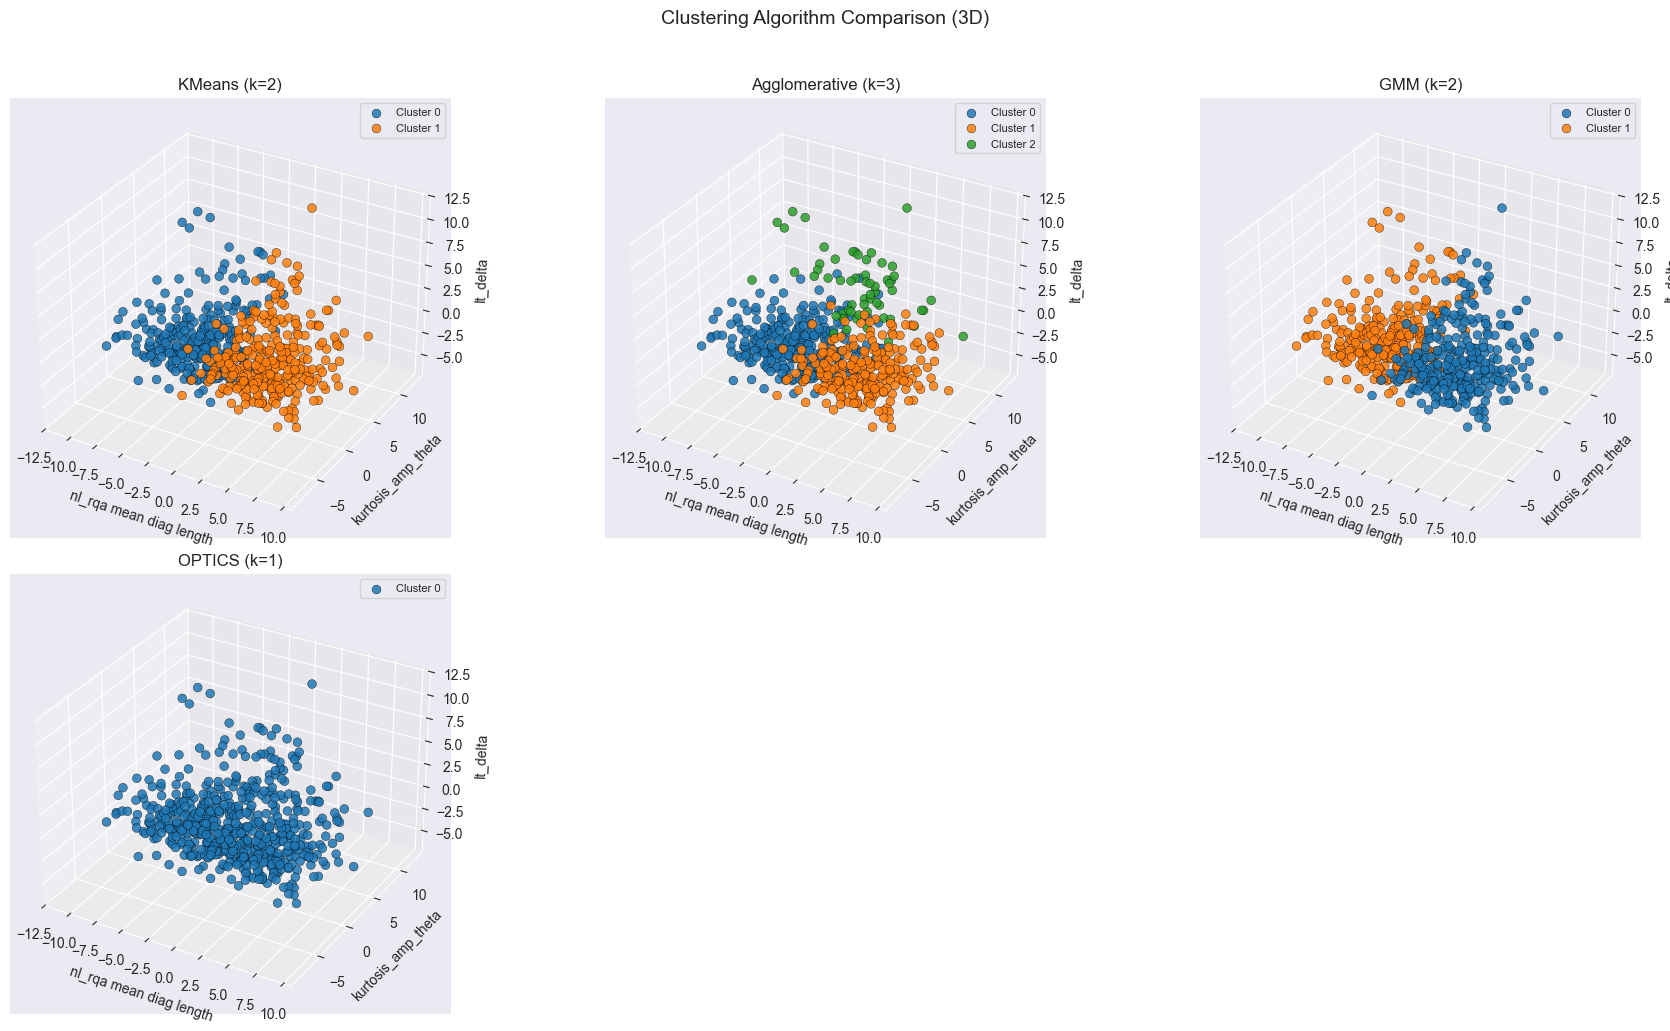

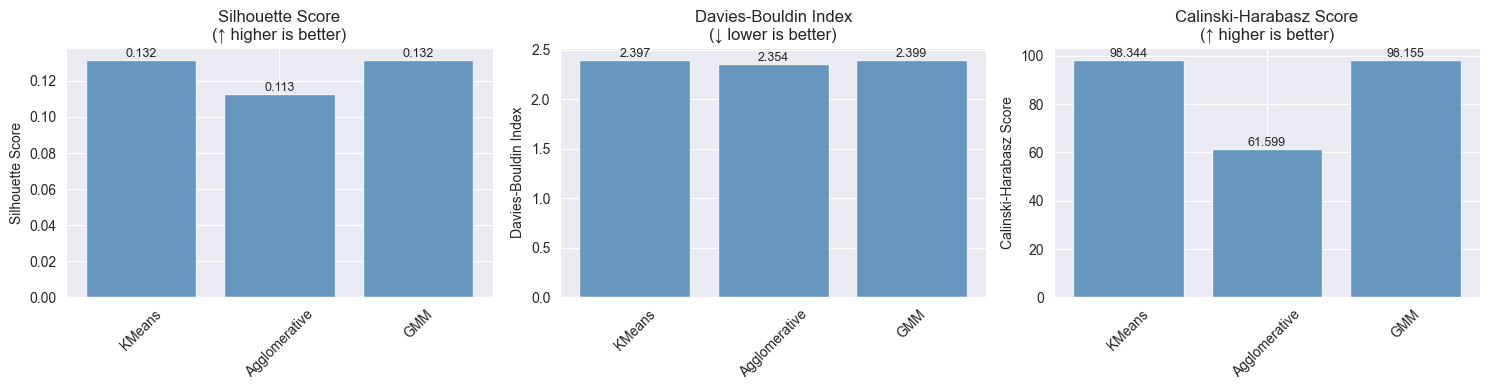

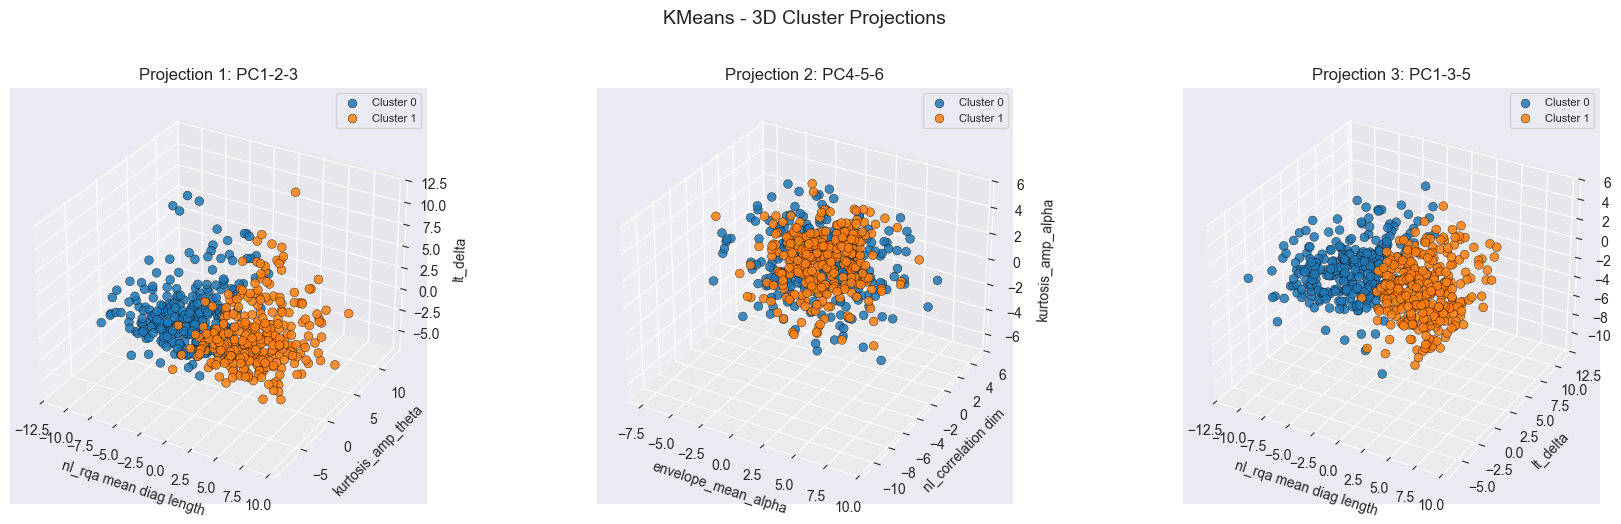

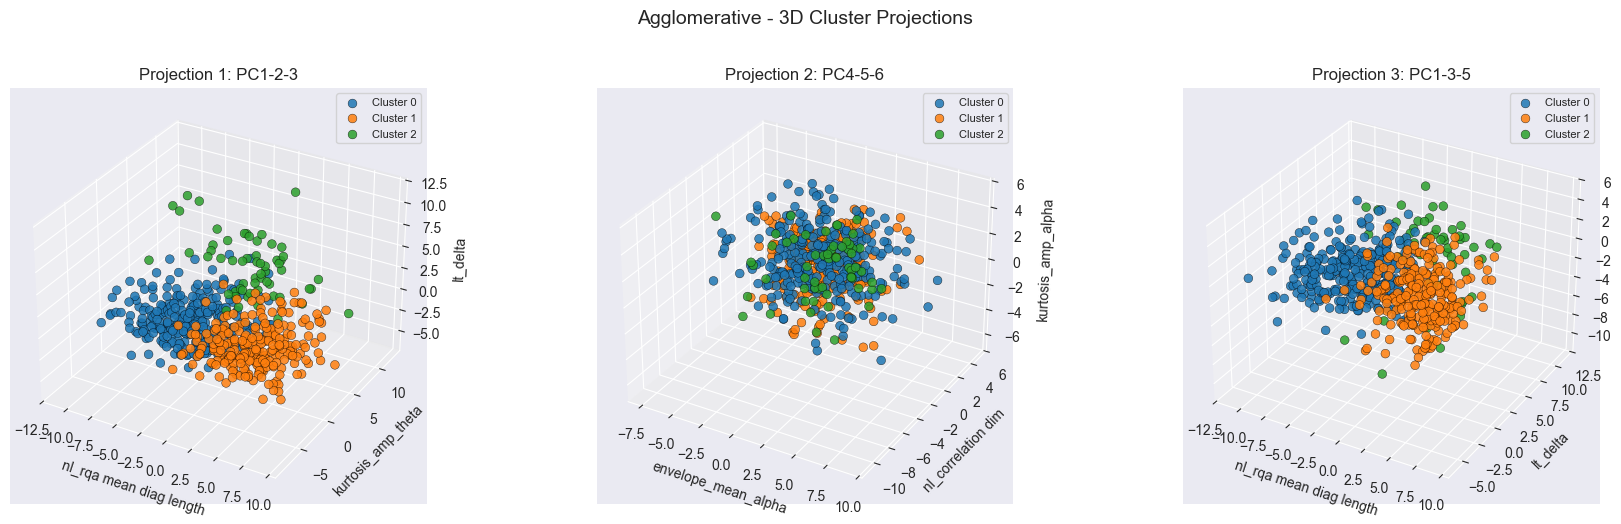

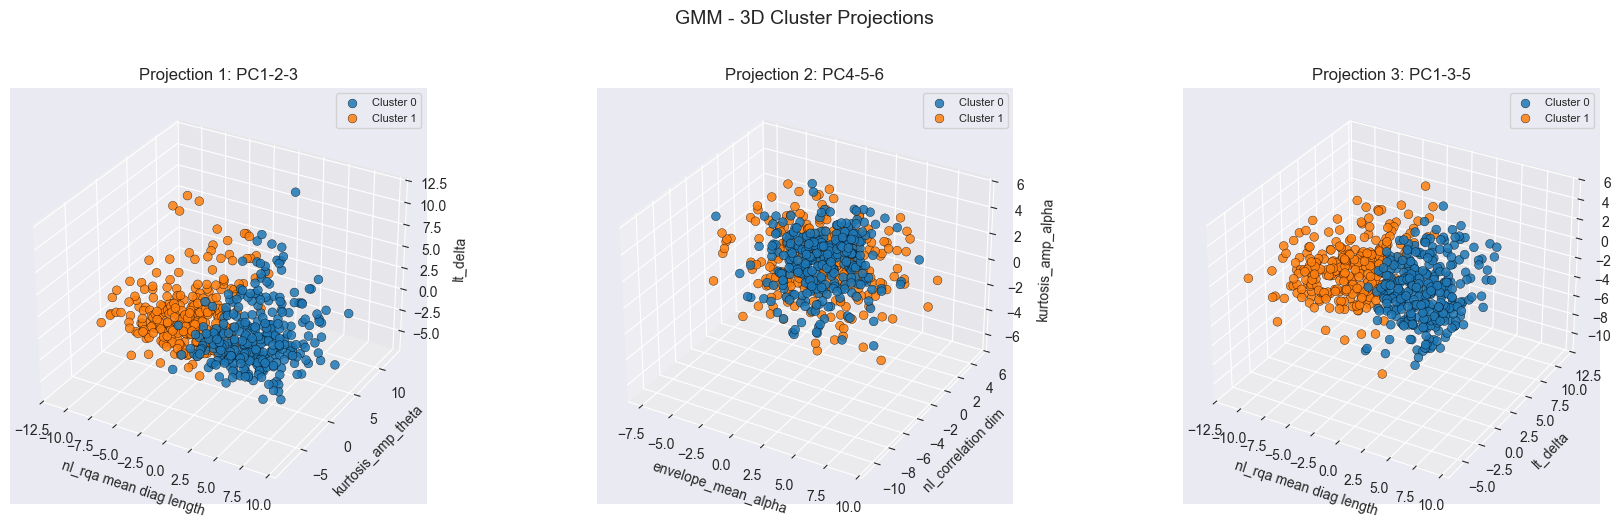

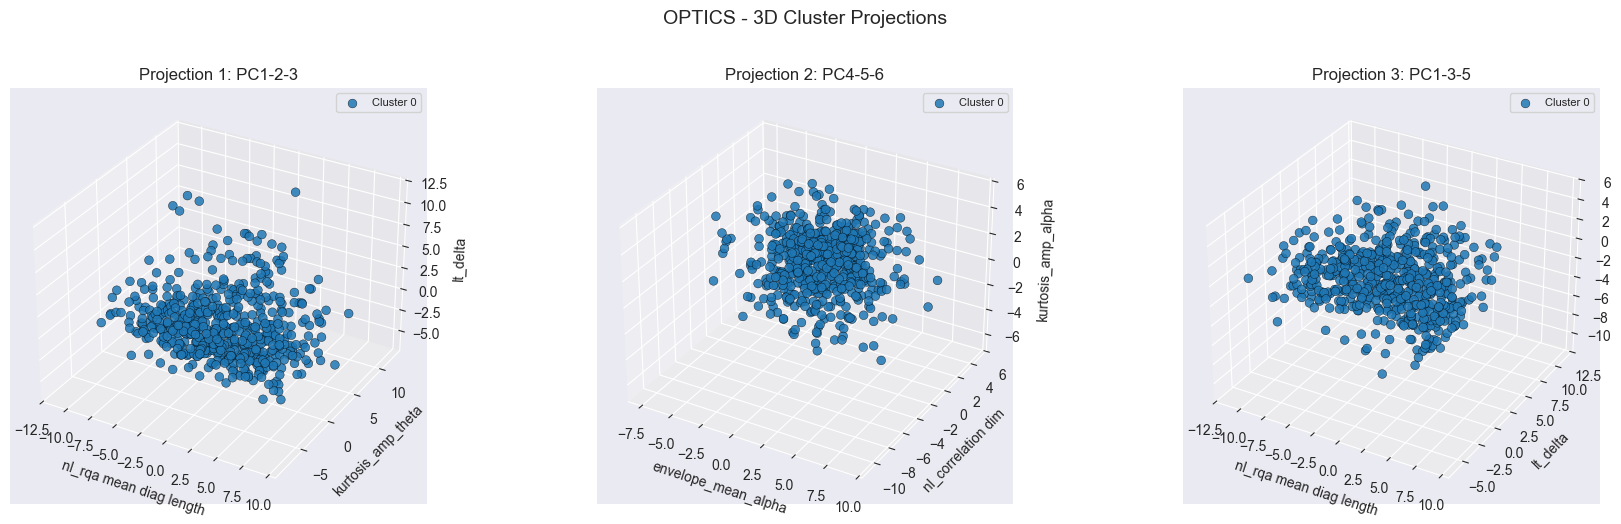


Summary Comparison
       Algorithm  Clusters  Noise Points Silhouette Davies-Bouldin Calinski-Harabasz
0         KMeans         2             0     0.1317         2.3966             98.34
1  Agglomerative         3             0     0.1128         2.3544             61.60
2            GMM         2             0     0.1315         2.3990             98.16
3         OPTICS         1             0        NaN            NaN               NaN


"\nfor name, res in results.items():\n    labels = res['labels']\n    out = pd.DataFrame({'label': labels}, index=X.index)\n    out.to_csv(f'dataset/{name}_Dortmund_preprocessed_labels.csv')\n "

In [19]:
# Load preprocessed data (assumes first column is subject ID)
data, features, subject_ids  = load_preprocessed_data('dataset/Lemon_features_preprocessed.csv') # can be changed out for Lemon/Dortmund dataset

config = CompareConfig(visualize_3d=True)

results = compare_clusters(data, config=config, feature_names=list(data.columns), verbose=True)

# optional save of cluster labels
"""
for name, res in results.items():
    labels = res['labels']
    out = pd.DataFrame({'label': labels}, index=X.index)
    out.to_csv(f'dataset/{name}_Dortmund_preprocessed_labels.csv')
 """


# External Metrics

       Epsilon-squared (ε²) = 0.0148 (Small)


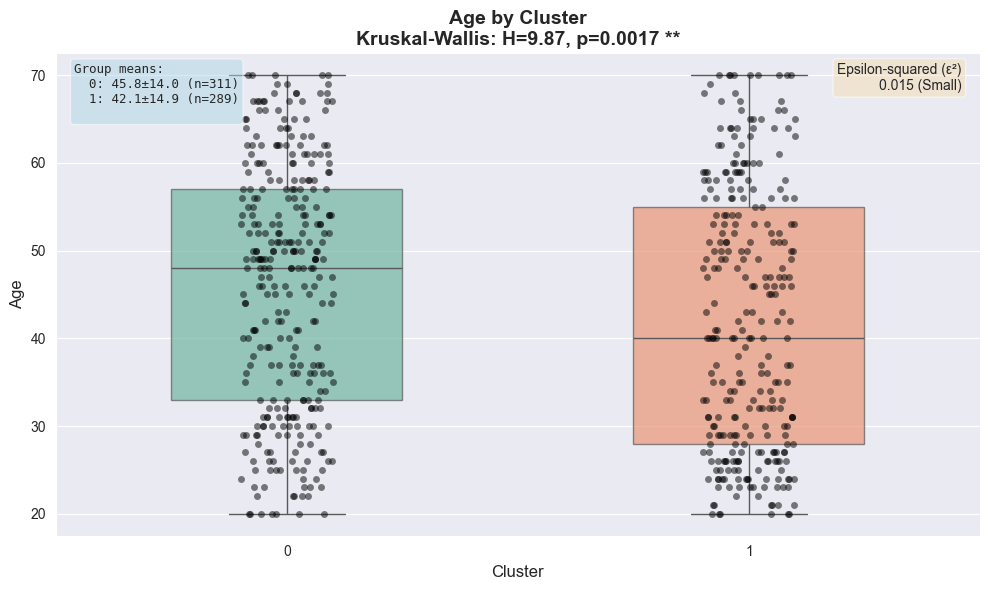


SUMMARY Continuous Variable
Test used: Kruskal-Wallis
Result: SIGNIFICANT (p=0.0017)
Significant pairs: [(np.int64(0), np.int64(1))]
Effect size: Epsilon-squared (ε²) = 0.0148 (Small)


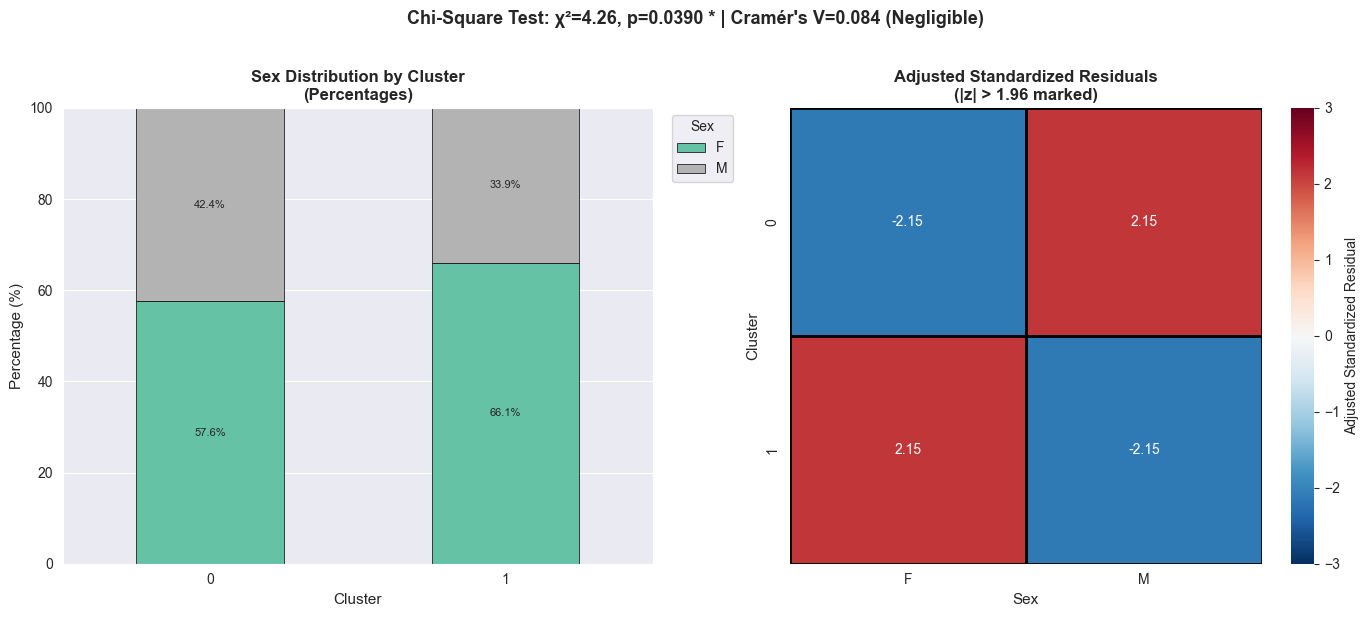


SUMMARY Categorical Analysis
Test used: Chi-Square Test
Result: SIGNIFICANT (p=0.0390)
Significant associations:
  ↓ 0 has under F (z=-2.15)
  ↑ 0 has over M (z=2.15)
  ↑ 1 has over F (z=2.15)
  ↓ 1 has under M (z=-2.15)
Effect size: Cramér's V = 0.0843 (Negligible)


In [21]:
from metrics.external_metrics import analyze_continuous_variable, analyze_categorical_variable, load_external_variables

# Load external variables
age, sex = load_external_variables("dataset/Lemon_age&sex.csv", subject_ids=subject_ids)

# Cluster Names ['KMeans', 'Agglomerative', 'GMM', 'OPTICS']
cluster_labels = results['GMM']['labels']

df_demographics = pd.DataFrame({
    'Cluster': cluster_labels,  # Replace with your best model's labels
    'Age': age,
    'Sex': sex
})

# Lemon dataset only has age_groups and not exact age such as Dortmund
#age_result = analyze_continuous_variable(df_demographics, 'Cluster', 'Age') # use with Dortmund dataset
age_result = analyze_categorical_variable(df_demographics, 'Cluster', 'Age') # use with Lemon Dataset

sex_result = analyze_categorical_variable(df_demographics, 'Cluster', 'Sex')